In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import the Dataset

In [2]:
#import the daatset
df = pd.read_csv('/Users/ceo/Downloads/Query Data  - Sheet1 (1).csv')
df

,order_no,staff_name,order_status,order_date,customer_name,trxn_batch_id,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
0,6,JPT-001,Paid,2-Jan-2022,Monica Federle,Buy-47857,BTC,Binance,Binance,"$1,264.12",473.62,2:23 PM,"₦598,713.22",2-Jan-2022,3:34:01 AM,Jan-2022,Website,True
1,8,JPT-001,Paid,3-Jan-2022,Bryan Davis,Buy-47858,BTC,Binance,Binance,"$5,800.08",473.54,2:23 PM,"₦2,746,546.68",2-Jan-2022,4:34:01 AM,Jan-2022,Website,True
2,9,JPT-001,Paid,3-Jan-2022,Carlos Daly,Buy-47858,BTC,Binance,Binance,$368.08,476.92,2:23 PM,"₦175,545.08",3-Jan-2022,5:34:01 AM,Jan-2022,Website,True
3,11,JPT-001,Paid,4-Jan-2022,Bryan Davis,Buy-47859,BTC,Binance,Binance,"$6,928.86",475.23,2:23 PM,"₦3,292,785.02",5-Jan-2022,9:34:01 AM,Jan-2022,Website,True
4,12,JPT-001,Paid,4-Jan-2022,Muhammed MacIntyre,Buy-47859,BTC,Binance,Binance,$929.50,473.54,2:23 PM,"₦440,151.71",6-Jan-2022,10:34:01 AM,Jan-2022,Website,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,6086,JPT-004,Paid,16-May-2023,Sean O'Donnell,Buy-3746,BTC,Trust,ObiEx,$84.47,617.29,5:46 PM,"₦52,144.14",16-May-2023,7:17:00 PM,May-2023,Website,False
5553,6087,JPT-004,Paid,16-May-2023,Shirley Schmidt,Buy-3746,BTC,Blockchain,ObiEx,$460.44,624.90,8:41 PM,"₦287,726.42",16-May-2023,8:47:00 PM,May-2023,Website,False
5554,6088,JPT-004,Confirmed,16-May-2023,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,"$6,326.18",630.82,8:59 PM,"₦3,990,663.79",16-May-2023,NaN,May-2023,Website,False
5555,6088,JPT-004,Paid,16-May-2023,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,"$1,867.92",630.82,10:27 PM,"₦1,178,318.83",16-May-2023,11:22:00 PM,May-2023,Website,False


In [3]:
#begin EDA by checking for Nan values in the dataset
df.isna().sum()

order_no                  0
staff_name                0
order_status              0
order_date                0
customer_name             3
trxn_batch_id             0
coin                      0
sender_wallet            12
receiver_wallet           0
coin_amount(usd)          0
purchase_rate(ngnusd)     0
order_time                2
amount_due(ngn)           0
date_paid                 1
time_paid                66
month                     0
channel                   2
completed?                0
dtype: int64

In [4]:
#check the number of rows and columns availabe
df.shape

(5557, 18)

In [5]:
#confirm all dtypes are correct for each column, 
#also count non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_no               5557 non-null   int64  
 1   staff_name             5557 non-null   object 
 2   order_status           5557 non-null   object 
 3   order_date             5557 non-null   object 
 4   customer_name          5554 non-null   object 
 5   trxn_batch_id          5557 non-null   object 
 6   coin                   5557 non-null   object 
 7   sender_wallet          5545 non-null   object 
 8   receiver_wallet        5557 non-null   object 
 9   coin_amount(usd)       5557 non-null   object 
 10  purchase_rate(ngnusd)  5557 non-null   float64
 11  order_time             5555 non-null   object 
 12  amount_due(ngn)        5557 non-null   object 
 13  date_paid              5556 non-null   object 
 14  time_paid              5491 non-null   object 
 15  mont

### Data Cleaning

In [6]:
#columns not in right dtype format are; 
#order_date,
#coin_amount,
#order_time,
#amount_due,
#date_paid,
#time_paid,
#month
df.order_date = pd.to_datetime(df.order_date)
df.order_date

0      2022-01-02
1      2022-01-03
2      2022-01-03
3      2022-01-04
4      2022-01-04
          ...    
5552   2023-05-16
5553   2023-05-16
5554   2023-05-16
5555   2023-05-16
5556   2023-05-16
Name: order_date, Length: 5557, dtype: datetime64[ns]

In [7]:
#discovered that all records in this coin_amount field has a '$' attached 
# & ',' in between.
df['coin_amount(usd)'] = df['coin_amount(usd)'].str.replace("$","")
df['coin_amount(usd)'] = df['coin_amount(usd)'].str.replace(",","")
df['coin_amount(usd)'] = df['coin_amount(usd)'].astype(float)
df['coin_amount(usd)'] 

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/1208197913.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['coin_amount(usd)'] = df['coin_amount(usd)'].str.replace("$","")


0       1264.12
1       5800.08
2        368.08
3       6928.86
4        929.50
         ...   
5552      84.47
5553     460.44
5554    6326.18
5555    1867.92
5556     289.33
Name: coin_amount(usd), Length: 5557, dtype: float64

In [8]:
#order_time was converted to datetime dtype
df.order_time = pd.to_datetime(df.order_time)
df.order_time 

0      2023-06-15 14:23:00
1      2023-06-15 14:23:00
2      2023-06-15 14:23:00
3      2023-06-15 14:23:00
4      2023-06-15 14:23:00
               ...        
5552   2023-06-15 17:46:00
5553   2023-06-15 20:41:00
5554   2023-06-15 20:59:00
5555   2023-06-15 22:27:00
5556   2023-06-15 22:33:00
Name: order_time, Length: 5557, dtype: datetime64[ns]

In [9]:
##discovered that all records in this amount_due field
#has a 'N' attached  & ',' in between.
df['amount_due(ngn)'] = df['amount_due(ngn)'].str.replace("₦","")
df['amount_due(ngn)'] = df['amount_due(ngn)'].str.replace(",","")
df['amount_due(ngn)'] = df['amount_due(ngn)'].astype(float)
df['amount_due(ngn)']

0        598713.22
1       2746546.68
2        175545.08
3       3292785.02
4        440151.71
           ...    
5552      52144.14
5553     287726.42
5554    3990663.79
5555    1178318.83
5556     181538.81
Name: amount_due(ngn), Length: 5557, dtype: float64

In [10]:
#date_paid converted into datetime
df.date_paid = pd.to_datetime(df.date_paid)
df.date_paid

0      2022-01-02
1      2022-01-02
2      2022-01-03
3      2022-01-05
4      2022-01-06
          ...    
5552   2023-05-16
5553   2023-05-16
5554   2023-05-16
5555   2023-05-16
5556   2023-05-16
Name: date_paid, Length: 5557, dtype: datetime64[ns]

In [11]:
df

,order_no,staff_name,order_status,order_date,customer_name,trxn_batch_id,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
0,6,JPT-001,Paid,2022-01-02,Monica Federle,Buy-47857,BTC,Binance,Binance,1264.12,473.62,2023-06-15 14:23:00,598713.22,2022-01-02,3:34:01 AM,Jan-2022,Website,True
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,Buy-47858,BTC,Binance,Binance,5800.08,473.54,2023-06-15 14:23:00,2746546.68,2022-01-02,4:34:01 AM,Jan-2022,Website,True
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,Buy-47858,BTC,Binance,Binance,368.08,476.92,2023-06-15 14:23:00,175545.08,2022-01-03,5:34:01 AM,Jan-2022,Website,True
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,Buy-47859,BTC,Binance,Binance,6928.86,475.23,2023-06-15 14:23:00,3292785.02,2022-01-05,9:34:01 AM,Jan-2022,Website,True
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,Buy-47859,BTC,Binance,Binance,929.50,473.54,2023-06-15 14:23:00,440151.71,2022-01-06,10:34:01 AM,Jan-2022,Website,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,6086,JPT-004,Paid,2023-05-16,Sean O'Donnell,Buy-3746,BTC,Trust,ObiEx,84.47,617.29,2023-06-15 17:46:00,52144.14,2023-05-16,7:17:00 PM,May-2023,Website,False
5553,6087,JPT-004,Paid,2023-05-16,Shirley Schmidt,Buy-3746,BTC,Blockchain,ObiEx,460.44,624.90,2023-06-15 20:41:00,287726.42,2023-05-16,8:47:00 PM,May-2023,Website,False
5554,6088,JPT-004,Confirmed,2023-05-16,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,6326.18,630.82,2023-06-15 20:59:00,3990663.79,2023-05-16,NaN,May-2023,Website,False
5555,6088,JPT-004,Paid,2023-05-16,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,1867.92,630.82,2023-06-15 22:27:00,1178318.83,2023-05-16,11:22:00 PM,May-2023,Website,False


In [12]:
#have a look at the entire dataframe once again
df

,order_no,staff_name,order_status,order_date,customer_name,trxn_batch_id,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
0,6,JPT-001,Paid,2022-01-02,Monica Federle,Buy-47857,BTC,Binance,Binance,1264.12,473.62,2023-06-15 14:23:00,598713.22,2022-01-02,3:34:01 AM,Jan-2022,Website,True
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,Buy-47858,BTC,Binance,Binance,5800.08,473.54,2023-06-15 14:23:00,2746546.68,2022-01-02,4:34:01 AM,Jan-2022,Website,True
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,Buy-47858,BTC,Binance,Binance,368.08,476.92,2023-06-15 14:23:00,175545.08,2022-01-03,5:34:01 AM,Jan-2022,Website,True
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,Buy-47859,BTC,Binance,Binance,6928.86,475.23,2023-06-15 14:23:00,3292785.02,2022-01-05,9:34:01 AM,Jan-2022,Website,True
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,Buy-47859,BTC,Binance,Binance,929.50,473.54,2023-06-15 14:23:00,440151.71,2022-01-06,10:34:01 AM,Jan-2022,Website,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,6086,JPT-004,Paid,2023-05-16,Sean O'Donnell,Buy-3746,BTC,Trust,ObiEx,84.47,617.29,2023-06-15 17:46:00,52144.14,2023-05-16,7:17:00 PM,May-2023,Website,False
5553,6087,JPT-004,Paid,2023-05-16,Shirley Schmidt,Buy-3746,BTC,Blockchain,ObiEx,460.44,624.90,2023-06-15 20:41:00,287726.42,2023-05-16,8:47:00 PM,May-2023,Website,False
5554,6088,JPT-004,Confirmed,2023-05-16,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,6326.18,630.82,2023-06-15 20:59:00,3990663.79,2023-05-16,NaN,May-2023,Website,False
5555,6088,JPT-004,Paid,2023-05-16,Dan Reichenbach,Buy-3746,BTC,Cashapp,ObiEx,1867.92,630.82,2023-06-15 22:27:00,1178318.83,2023-05-16,11:22:00 PM,May-2023,Website,False


In [13]:
#now begin to clean nan values
df.isna().sum()

order_no                  0
staff_name                0
order_status              0
order_date                0
customer_name             3
trxn_batch_id             0
coin                      0
sender_wallet            12
receiver_wallet           0
coin_amount(usd)          0
purchase_rate(ngnusd)     0
order_time                2
amount_due(ngn)           0
date_paid                 1
time_paid                66
month                     0
channel                   2
completed?                0
dtype: int64

In [14]:
df[df.customer_name.isna()]

,order_no,staff_name,order_status,order_date,customer_name,trxn_batch_id,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
4705,5256,JPT-004,Paid,2023-03-03,NaN,Buy-3674,USDT,Trust,SafePal,1338.48,617.29,2023-06-15 15:11:00,826227.64,2023-03-03,3:44:00 PM,Mar-2023,Website,True
4720,5270,JPT-004,Paid,2023-03-04,NaN,Buy-3675,BTC,Trust,SafePal,1115.40,617.29,2023-06-15 17:10:00,688523.04,2023-03-04,6:14:00 PM,Mar-2023,Website,True
4822,5382,JPT-003,Paid,2023-03-12,NaN,Buy-3684,USDT,SafePal,SafePal,1677.56,621.52,2023-06-15 17:55:00,1042631.38,2023-03-12,5:58:00 PM,Mar-2023,Website,True


In [15]:
#find Nan values in customer_name column
#drop records with Nan values
df.customer_name = df.customer_name.dropna()
df.isna().sum()

order_no                  0
staff_name                0
order_status              0
order_date                0
customer_name             3
trxn_batch_id             0
coin                      0
sender_wallet            12
receiver_wallet           0
coin_amount(usd)          0
purchase_rate(ngnusd)     0
order_time                2
amount_due(ngn)           0
date_paid                 1
time_paid                66
month                     0
channel                   2
completed?                0
dtype: int64

In [16]:
#drop all irrelvant columns to this analysis
#eg. trxn_batch_id
df.drop(inplace = True,columns ='trxn_batch_id')
df.isna().sum()

order_no                  0
staff_name                0
order_status              0
order_date                0
customer_name             3
coin                      0
sender_wallet            12
receiver_wallet           0
coin_amount(usd)          0
purchase_rate(ngnusd)     0
order_time                2
amount_due(ngn)           0
date_paid                 1
time_paid                66
month                     0
channel                   2
completed?                0
dtype: int64

In [17]:
#check Nan values in sender_wallet column
df[df.sender_wallet.isna()]


,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
452,598,JPT-002,Paid,2022-03-09,Fred Wasserman,BTC,NaN,ObiEx,461.03,482.84,2023-06-15 17:51:00,222603.58,2022-03-09,5:53:00 PM,Mar-2022,Website,True
482,635,JPT-002,Paid,2022-03-12,Fred Wasserman,BTC,NaN,ObiEx,1360.79,485.37,2023-06-15 20:19:00,660491.66,2022-03-12,8:24:00 PM,Mar-2022,Website,True
485,638,JPT-002,Paid,2022-03-12,Fred Wasserman,BTC,NaN,ObiEx,544.32,482.84,2023-06-15 01:36:00,262815.84,2022-03-12,3:25:00 AM,Mar-2022,Website,True
1640,2024,JPT-001,Paid,2022-07-06,Dan Reichenbach,BTC,NaN,ObiEx,212.24,511.59,2023-06-15 18:20:00,108578.57,2022-07-06,6:45:00 PM,Jul-2022,Website,True
1648,2035,JPT-001,Paid,2022-07-07,Meg O'Connel,BTC,NaN,ObiEx,577.91,513.28,2023-06-15 13:13:00,296629.72,2022-07-07,1:39:00 PM,Jul-2022,Website,True
1649,2036,JPT-001,Paid,2022-07-07,Sarah Bern,BTC,NaN,ObiEx,706.23,514.97,2023-06-15 14:41:00,363685.83,2022-07-07,3:41:00 PM,Jul-2022,Website,True
1664,2053,JPT-004,Paid,2022-07-08,Muhammed MacIntyre,BTC,NaN,ObiEx,1969.05,514.97,2023-06-15 21:03:00,1014003.91,2022-07-08,9:25:00 PM,Jul-2022,Website,True
1670,2060,JPT-004,Paid,2022-07-09,Monica Federle,USDT,NaN,ObiEx,294.47,513.28,2023-06-15 11:08:00,151143.07,2022-07-09,11:16:00 AM,Jul-2022,Website,True
1784,2196,JPT-004,Paid,2022-07-21,Monica Federle,USDT,NaN,ObiEx,223.08,532.73,2023-06-15 15:33:00,118840.96,2022-07-21,3:38:00 PM,Jul-2022,Website,True
1898,2347,JPT-001,Confirmed,2022-07-29,#REF!,USDT,NaN,ObiEx,368.83,566.55,2023-06-15 14:03:00,208958.88,NaT,NaN,Jul-2022,Website,True


In [18]:
#copy dataframe before dropping cells
df1 = df
#drop all Nan values that are highly relevant to your analysis
df1 = df1.dropna(subset = ['sender_wallet',
                           'customer_name',
                           'coin_amount(usd)',
                           'purchase_rate(ngnusd)',
                           'amount_due(ngn)',
                           'date_paid',
                           'order_time',])

df1.sender_wallet.isna().sum()

0

In [19]:
df1.isna().sum()

order_no                  0
staff_name                0
order_status              0
order_date                0
customer_name             0
coin                      0
sender_wallet             0
receiver_wallet           0
coin_amount(usd)          0
purchase_rate(ngnusd)     0
order_time                0
amount_due(ngn)           0
date_paid                 0
time_paid                65
month                     0
channel                   2
completed?                0
dtype: int64

In [20]:
#fill order_time with avg order time
df1.order_time.mean()
df1.order_time.fillna('2023-05-14 14:16:02.395624448',inplace=True)
df1.order_time = pd.to_datetime(df1.order_time)
df1.order_time = df1.order_time.dt.time
df1.order_time

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/247346360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.order_time.fillna('2023-05-14 14:16:02.395624448',inplace=True)
/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/247346360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.order_time = pd.to_datetime(df1.order_time)
/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/247346360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

0       14:23:00
1       14:23:00
2       14:23:00
3       14:23:00
4       14:23:00
          ...   
5552    17:46:00
5553    20:41:00
5554    20:59:00
5555    22:27:00
5556    22:33:00
Name: order_time, Length: 5540, dtype: object

In [21]:
#confirm the dtype for order_date
df1.order_date.dtype

dtype('<M8[ns]')

In [22]:
#to fill the time column with mode of time_paid
df1.time_paid.mode()
#now, fill with mode time_paid
df1.time_paid.fillna('5:34:01 AM',inplace=True)

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/1844679297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.time_paid.fillna('5:34:01 AM',inplace=True)


In [23]:
df1.time_paid = pd.to_datetime(df1.time_paid)
df1.time_paid = df1.time_paid.dt.time
df1.time_paid

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/3485946194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.time_paid = pd.to_datetime(df1.time_paid)
/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/3485946194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.time_paid = df1.time_paid.dt.time


0       03:34:01
1       04:34:01
2       05:34:01
3       09:34:01
4       10:34:01
          ...   
5552    19:17:00
5553    20:47:00
5554    05:34:01
5555    23:22:00
5556    23:36:00
Name: time_paid, Length: 5540, dtype: object

In [24]:
#check dataframe again for Nan Values
df1.isna().sum()

order_no                 0
staff_name               0
order_status             0
order_date               0
customer_name            0
coin                     0
sender_wallet            0
receiver_wallet          0
coin_amount(usd)         0
purchase_rate(ngnusd)    0
order_time               0
amount_due(ngn)          0
date_paid                0
time_paid                0
month                    0
channel                  2
completed?               0
dtype: int64

In [25]:
#check for unique content of the channel column
df1.channel.unique()

array(['Website', 'P2P', nan], dtype=object)

In [26]:
#check for rows that show nan
df1[df1.channel.isna()]


,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
2777,3359,JPT-004,Paid,2022-10-09,Ken Heidel,BTC,Blockchain,ObiEx,118.68,604.60,14:09:00,71753.53,2022-10-09,14:42:00,Oct-2022,NaN,True
3852,4415,JPT-004,Confirmed,2022-12-20,Eli Bockman,USDT,Binance,SafePal,368.83,617.29,16:31:00,227671.62,2022-12-20,05:34:01,Dec-2022,NaN,True


In [27]:
#drop Nan Values from channel column because they have only little amounts 
#and may add no signifcant value to our analysis
df2 = df1[~df1.channel.isna()]

In [28]:
# hence we create a new dataframe.
df2

,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?
0,6,JPT-001,Paid,2022-01-02,Monica Federle,BTC,Binance,Binance,1264.12,473.62,14:23:00,598713.22,2022-01-02,03:34:01,Jan-2022,Website,True
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,BTC,Binance,Binance,5800.08,473.54,14:23:00,2746546.68,2022-01-02,04:34:01,Jan-2022,Website,True
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,BTC,Binance,Binance,368.08,476.92,14:23:00,175545.08,2022-01-03,05:34:01,Jan-2022,Website,True
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,BTC,Binance,Binance,6928.86,475.23,14:23:00,3292785.02,2022-01-05,09:34:01,Jan-2022,Website,True
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,929.50,473.54,14:23:00,440151.71,2022-01-06,10:34:01,Jan-2022,Website,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,6086,JPT-004,Paid,2023-05-16,Sean O'Donnell,BTC,Trust,ObiEx,84.47,617.29,17:46:00,52144.14,2023-05-16,19:17:00,May-2023,Website,False
5553,6087,JPT-004,Paid,2023-05-16,Shirley Schmidt,BTC,Blockchain,ObiEx,460.44,624.90,20:41:00,287726.42,2023-05-16,20:47:00,May-2023,Website,False
5554,6088,JPT-004,Confirmed,2023-05-16,Dan Reichenbach,BTC,Cashapp,ObiEx,6326.18,630.82,20:59:00,3990663.79,2023-05-16,05:34:01,May-2023,Website,False
5555,6088,JPT-004,Paid,2023-05-16,Dan Reichenbach,BTC,Cashapp,ObiEx,1867.92,630.82,22:27:00,1178318.83,2023-05-16,23:22:00,May-2023,Website,False


In [29]:
#check that our new dataframe has no Nan values
df2.isna().sum()

order_no                 0
staff_name               0
order_status             0
order_date               0
customer_name            0
coin                     0
sender_wallet            0
receiver_wallet          0
coin_amount(usd)         0
purchase_rate(ngnusd)    0
order_time               0
amount_due(ngn)          0
date_paid                0
time_paid                0
month                    0
channel                  0
completed?               0
dtype: int64

-----

### Data Wrangling & Data Manipulation

In [30]:
#Great!, We have a clean Dataset
#Now we can begin to analyze our data

In [31]:
df2.columns

Index(['order_no', 'staff_name', 'order_status', 'order_date', 'customer_name',
       'coin', 'sender_wallet', 'receiver_wallet', 'coin_amount(usd)',
       'purchase_rate(ngnusd)', 'order_time', 'amount_due(ngn)', 'date_paid',
       'time_paid', 'month', 'channel', 'completed?'],
      dtype='object')

In [32]:
#What are the targets of our analysis?
#We are to analyze our data in group of months for all paid transactions


In [33]:
#use the order_date column to recreate the month column
#this is a accuracy pre-emptive measure 
#as we aren't sure of the accuracy of the data from it's database source.
#so we recreate data from whahtever column we have used before.
#this will assure maximum correctness in the data.
df2.month = pd.to_datetime(df2.order_date)
df2.month = df2.month.dt.month_name()



/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/1272851791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.month = pd.to_datetime(df2.order_date)
/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/1272851791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.month = df2.month.dt.month_name()


In [34]:
#confirm month
df2.month

0       January
1       January
2       January
3       January
4       January
         ...   
5552        May
5553        May
5554        May
5555        May
5556        May
Name: month, Length: 5538, dtype: object

In [35]:
#confirm year
df2['year'] = df2.order_date.dt.year
df2['year']

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/3721964236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2.order_date.dt.year


0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
5552    2023
5553    2023
5554    2023
5555    2023
5556    2023
Name: year, Length: 5538, dtype: int64

In [36]:
#create a month-year column 
df2['month_year'] = df2['month'].astype(str)+ '-' + df2['year'].astype(str)
df2['month_year']

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/2230014635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_year'] = df2['month'].astype(str)+ '-' + df2['year'].astype(str)


0       January-2022
1       January-2022
2       January-2022
3       January-2022
4       January-2022
            ...     
5552        May-2023
5553        May-2023
5554        May-2023
5555        May-2023
5556        May-2023
Name: month_year, Length: 5538, dtype: object

In [37]:
#After grouping by months, delete all unpaid orders, 
#all incomplete orders & all p2p vendor orders
#confirm their status
df3=df2[(df2.order_status=='Paid')
        &(df2['completed?'])==True
        & (df2.customer_name!='P2P Vendor')]


In [38]:
df3.customer_name.unique()

array(['Monica Federle', 'Bryan Davis', 'Carlos Daly',
       'Muhammed MacIntyre', 'Bryan Mills', 'Fred Wasserman',
       'Filia McAdams', 'Sanjit Chand', 'Luke Weiss', 'Rob Dowd',
       'Tony Chapman', 'Khloe Miller', 'Kristina Nunn', 'Bobby Odegard',
       'Adam Bellavance', 'Rick Reed', "Anthony O'Donnell",
       'Justin Hirsh', 'Heather Jas', 'Cathy Armstrong', 'Ivan Liston',
       'Sarah Jordon', 'Jim Radford', 'Grant Carroll', 'Doug Bickford',
       'Cindy Schnelling', 'Sylvia Foulston', 'Charles McCrossin',
       'Brendan Dodson', 'Jeremy Lonsdale', 'Jack Lebron',
       'Hilary Holden', 'Joy Smith', 'Erica Bern', 'Greg Guthrie',
       'Jim Sink', 'Brian Moss', 'Sonia Sunley', 'Shahid Shariari',
       'Roy Skaria', 'Lela Donovan', 'Alan Barnes', 'Dana Kaydos',
       'Bruce Stewart', 'Bill Eplett', 'Thomas Seio', 'Beth Thompson',
       'Helen Abelman', 'Kimberly Carter', 'Emily Grady',
       'Thomas Brumley', 'Mile Cammocke', "Mary O'Rourke",
       'Carlos Soltero',

In [39]:
#Now we can use grouping by our surrogate key
df4 = df3.groupby('month_year')

In [40]:
#create and store dataframes by each month
Jan_2022_sales_data = df4.get_group('January-2022')
Feb_2022_sales_data = df4.get_group('February-2022')
Mar_2022_sales_data = df4.get_group('March-2022')
Apr_2022_sales_data = df4.get_group('April-2022')
May_2022_sales_data = df4.get_group('May-2022')
Jun_2022_sales_data = df4.get_group('June-2022')
July_2022_sales_data = df4.get_group('July-2022')
Aug_2022_sales_data = df4.get_group('August-2022')
Sep_2022_sales_data = df4.get_group('September-2022')
Oct_2022_sales_data = df4.get_group('October-2022')
Nov_2022_sales_data = df4.get_group('November-2022')
Dec_2022_sales_data = df4.get_group('December-2022')
Jan_2023_sales_data = df4.get_group('January-2023')
Feb_2023_sales_data = df4.get_group('February-2023')
Mar_2023_sales_data = df4.get_group('March-2023')
Apr_2023_sales_data = df4.get_group('April-2023')
May_2023_sales_data = df4.get_group('May-2023')



----

#### Analysis Begins  

In [41]:
#Find the sales rev & sales count for Jan-2022
Jan_2022_sales_data

,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?,year,month_year
0,6,JPT-001,Paid,2022-01-02,Monica Federle,BTC,Binance,Binance,1264.12,473.62,14:23:00,598713.22,2022-01-02,03:34:01,January,Website,True,2022,January-2022
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,BTC,Binance,Binance,5800.08,473.54,14:23:00,2746546.68,2022-01-02,04:34:01,January,Website,True,2022,January-2022
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,BTC,Binance,Binance,368.08,476.92,14:23:00,175545.08,2022-01-03,05:34:01,January,Website,True,2022,January-2022
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,BTC,Binance,Binance,6928.86,475.23,14:23:00,3292785.02,2022-01-05,09:34:01,January,Website,True,2022,January-2022
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,929.50,473.54,14:23:00,440151.71,2022-01-06,10:34:01,January,Website,True,2022,January-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,247,JPT-001,Paid,2022-01-31,Bobby Odegard,BTC,Binance,Binance,557.70,477.76,14:23:00,266448.98,2022-03-26,17:34:01,January,Website,True,2022,January-2022
180,248,JPT-001,Paid,2022-01-31,Khloe Miller,BTC,Binance,Binance,1111.68,477.76,14:23:00,531121.64,2022-03-27,18:34:01,January,Website,True,2022,January-2022
181,249,JPT-001,Paid,2022-01-31,Lela Donovan,BTC,Binance,Binance,3022.73,481.99,14:23:00,1456933.61,2022-03-28,19:34:01,January,Website,True,2022,January-2022
182,250,JPT-001,Paid,2022-01-31,Lela Donovan,BTC,Binance,Binance,16369.61,481.99,14:23:00,7890021.26,2022-03-29,14:46:29,January,Website,True,2022,January-2022


In [42]:
#Identify January_2022 sales average 
Jan_2022_sales_rev_avg = Jan_2022_sales_data['coin_amount(usd)'].mean()
Jan_2022_sales_rev_avg

3747.599945652174

In [43]:
#Identify Jan_2022 sales above average sales
Jan_2022_sales_rev = Jan_2022_sales_data.groupby(
    ['customer_name'])['coin_amount(usd)'
                      ].sum().sort_values(ascending=True)
Jan_2022_sales_rev =  Jan_2022_sales_rev[
    (Jan_2022_sales_rev.values>=Jan_2022_sales_rev_avg)]
Jan_2022_sales_rev


customer_name
Jack Lebron             4010.98
Cathy Armstrong         4811.84
Muhammed MacIntyre      4882.47
Doug Bickford           5045.32
Justin Hirsh            5751.00
Brian Moss              6303.50
Adam Bellavance         6749.65
Jim Sink                8490.42
Khloe Miller           10741.30
Jeremy Lonsdale        11813.57
Luke Weiss             14613.22
Ivan Liston            16378.54
Cindy Schnelling       17648.60
Lela Donovan           19392.34
Bobby Odegard          23729.02
Filia McAdams          42249.12
Fred Wasserman         53412.80
Heather Jas            56953.37
Tony Chapman          103582.00
Bryan Davis           107079.13
Monica Federle        130436.36
Name: coin_amount(usd), dtype: float64

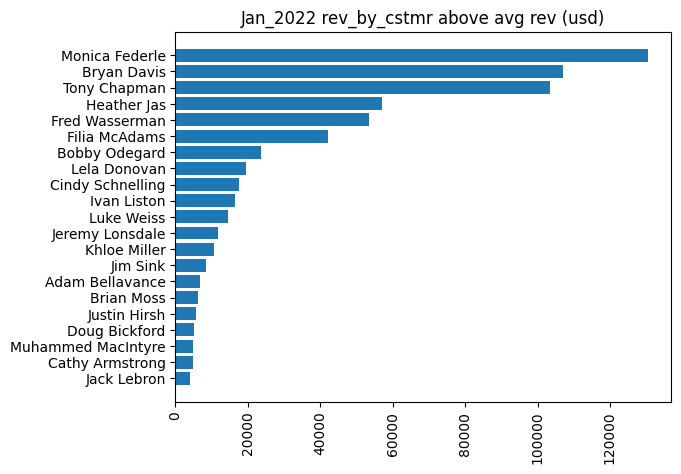

In [44]:
#Bar graph showing customers above avg sales
x = Jan_2022_sales_rev.index
y = Jan_2022_sales_rev.values
plt.barh(x,y)
plt.xticks(rotation=90)
plt.title('Jan_2022 rev_by_cstmr above avg rev (usd)')
plt.show()

In [45]:
#Identify Jan_2022 sales count average
Jan_2022_sales_count_avg = Jan_2022_sales_data[
    'customer_name'].value_counts().mean()
Jan_2022_sales_count_avg

4.487804878048781

In [46]:
#Identify Jan_2022 customers above avg sales count
Jan_2022_sales_count = Jan_2022_sales_data[
    'customer_name'].value_counts().sort_values(ascending=True)
Jan_2022_sales_count = Jan_2022_sales_count[
    Jan_2022_sales_count.values>=Jan_2022_sales_count_avg]
Jan_2022_sales_count

Erica Bern             5
Muhammed MacIntyre     5
Luke Weiss             6
Tony Chapman           8
Bryan Davis           12
Khloe Miller          13
Bobby Odegard         17
Fred Wasserman        21
Monica Federle        35
Name: customer_name, dtype: int64

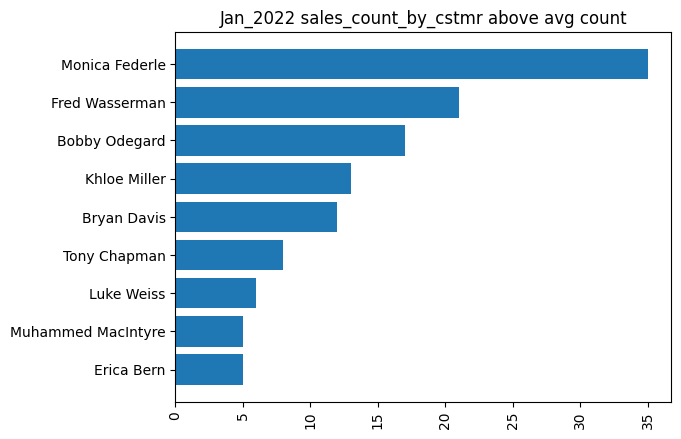

In [47]:
#Bar graph showing customers above avg sales count
x = Jan_2022_sales_count.index
y = Jan_2022_sales_count.values
plt.barh(x,y)
plt.xticks(rotation=90)
plt.title('Jan_2022 sales_count_by_cstmr above avg count')
plt.show()

In [48]:
#Convert sales revenue to dataframe
Jan_2022_sales_rev = Jan_2022_sales_rev.reset_index()
Jan_2022_sales_rev

,customer_name,coin_amount(usd)
0,Jack Lebron,4010.98
1,Cathy Armstrong,4811.84
2,Muhammed MacIntyre,4882.47
3,Doug Bickford,5045.32
4,Justin Hirsh,5751.00
5,Brian Moss,6303.50
6,Adam Bellavance,6749.65
7,Jim Sink,8490.42
8,Khloe Miller,10741.30
9,Jeremy Lonsdale,11813.57


In [49]:
#Convert sales count to dataframe
Jan_2022_sales_count = Jan_2022_sales_count.reset_index()
Jan_2022_sales_count

,index,customer_name
0,Erica Bern,5
1,Muhammed MacIntyre,5
2,Luke Weiss,6
3,Tony Chapman,8
4,Bryan Davis,12
5,Khloe Miller,13
6,Bobby Odegard,17
7,Fred Wasserman,21
8,Monica Federle,35


In [50]:
#Rename the both column headers for easy merging
Jan_2022_sales_count.rename(columns = {
    'index':'customer_name','customer_name':'sales_count'},inplace=True)
Jan_2022_sales_rev.rename(columns = {
    'coin_amount(usd)':'sales_rev'},inplace=True)

In [51]:
Jan_2022_sales_count

,customer_name,sales_count
0,Erica Bern,5
1,Muhammed MacIntyre,5
2,Luke Weiss,6
3,Tony Chapman,8
4,Bryan Davis,12
5,Khloe Miller,13
6,Bobby Odegard,17
7,Fred Wasserman,21
8,Monica Federle,35


In [52]:
Jan_2022_sales_rev

,customer_name,sales_rev
0,Jack Lebron,4010.98
1,Cathy Armstrong,4811.84
2,Muhammed MacIntyre,4882.47
3,Doug Bickford,5045.32
4,Justin Hirsh,5751.00
5,Brian Moss,6303.50
6,Adam Bellavance,6749.65
7,Jim Sink,8490.42
8,Khloe Miller,10741.30
9,Jeremy Lonsdale,11813.57


----

## Merge DataFrames to meet Stakeholders criteria

In [53]:
#Perform merge on all data so you get the dataframe of only customers
#who meet both criteria
jan_22_df= Jan_2022_sales_rev.merge(Jan_2022_sales_count)
jan_22_df

,customer_name,sales_rev,sales_count
0,Muhammed MacIntyre,4882.47,5
1,Khloe Miller,10741.30,13
2,Luke Weiss,14613.22,6
3,Bobby Odegard,23729.02,17
4,Fred Wasserman,53412.80,21
5,Tony Chapman,103582.00,8
6,Bryan Davis,107079.13,12
7,Monica Federle,130436.36,35


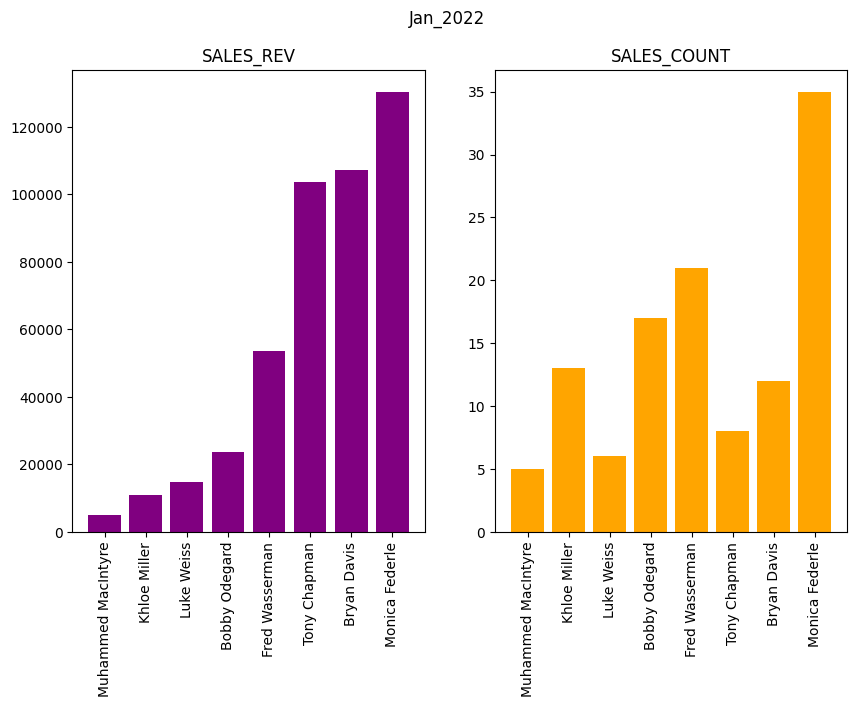

In [54]:
#Now use plot 
x = jan_22_df.customer_name
y1 = jan_22_df.sales_rev
y2 = jan_22_df.sales_count
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(x,y1, width = 0.8,color = 'purple')
plt.xticks(rotation =90)
plt.title('SALES_REV')

plt.subplot(1,2,2)
plt.bar(x,y2, width = 0.8,color = 'orange')
plt.xticks(rotation = 90)
plt.title('SALES_COUNT')

#plt.title('chart showing sales_rev to sales_count 
#for ONLY consistent cstmrs in Jan-2022')
plt.suptitle('Jan_2022')
plt.show()

----

### Now define a function based on these steps to automate the results for each month.

In [55]:
def month_group(df):
    sales_rev_avg = df['coin_amount(usd)'].mean()
    sales_rev = df.groupby(['customer_name'])[
        'coin_amount(usd)'].sum().sort_values(ascending=True)
    sales_rev = sales_rev[
        ( sales_rev>=sales_rev_avg)]
    sales_count_avg = df['customer_name'].value_counts().mean()
    sales_count = df[
        'customer_name'].value_counts().sort_values(ascending=True)
    sales_count= sales_count[sales_count.values>=sales_count_avg]
    sales_rev = sales_rev.reset_index()
    sales_count = sales_count.reset_index()
    sales_count.rename(columns = {
        'index':'customer_name','customer_name':'sales_count'},inplace=True)
    sales_rev.rename(columns = {
        'coin_amount(usd)':'sales_rev'},inplace=True)
    df1 = sales_rev.merge(sales_count)
    return df1

#### Testing our function with Feb_2022 data

In [56]:
feb_22_df = month_group(Feb_2022_sales_data)
feb_22_df

,customer_name,sales_rev,sales_count
0,Shahid Shariari,11200.84,7
1,Khloe Miller,14184.18,11
2,Fred Wasserman,14256.29,24
3,Luke Weiss,21146.49,8
4,Bobby Odegard,24107.51,22
5,Jeremy Lonsdale,27353.32,8
6,Adam Bellavance,28796.66,6
7,Bryan Davis,75872.47,9
8,Brian Moss,212500.79,10
9,Monica Federle,223785.67,21


----

### Now Write a function to plot each dataframe to automate our graphs


#### We start with February-2022

In [57]:
month_year = 'Feb_2022'

In [58]:
def plot_df(df,month_year):
    x = df.customer_name
    y1 = df.sales_rev
    y2 = df.sales_count
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.bar(x,y1, width = 0.8, color='purple')
    plt.xticks(rotation =90)
    plt.title('SALES_REV')
    plt.subplot(1,2,2)
    plt.bar(x,y2, width = 0.8,color = 'orange')
    plt.xticks(rotation = 90)
    plt.title('SALES_COUNT')
    plt.suptitle(month_year)
    return plt.show()

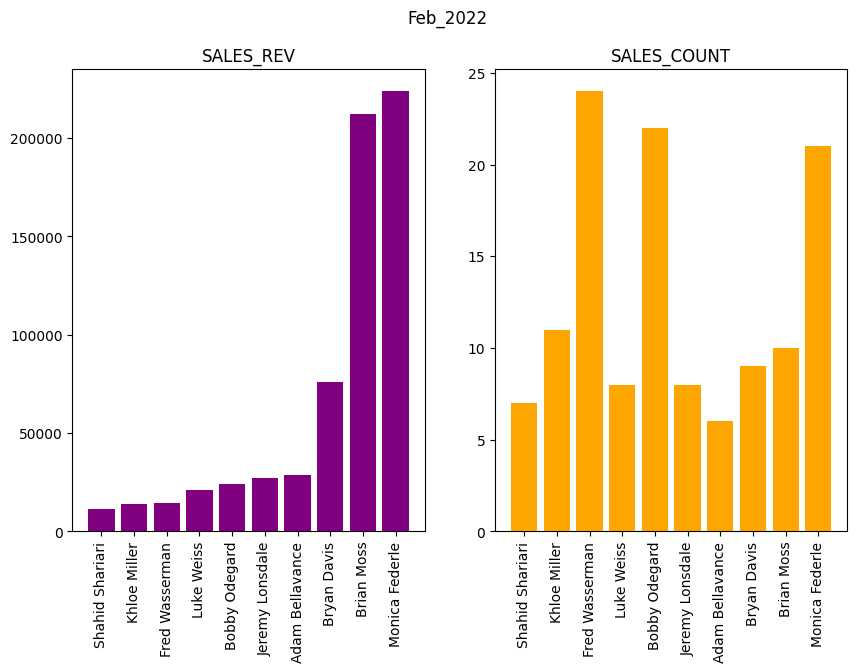

In [59]:
plot_df(feb_22_df,month_year)

----

### Use DataFrame & Graph function to get results for each month

#### March-2022

In [60]:
#Get the Dataframe
mar_22_df = month_group(Mar_2022_sales_data)
mar_22_df

,customer_name,sales_rev,sales_count
0,Erica Bern,8426.47,7
1,Dan Reichenbach,9876.51,7
2,Jeremy Lonsdale,12716.30,8
3,Christopher Schild,13804.93,7
4,Shahid Shariari,13954.41,14
5,Mike Pelletier,16625.40,7
6,Khloe Miller,21061.72,18
7,Greg Guthrie,30134.40,11
8,Fred Wasserman,36192.53,33
9,Bryan Davis,42576.28,16


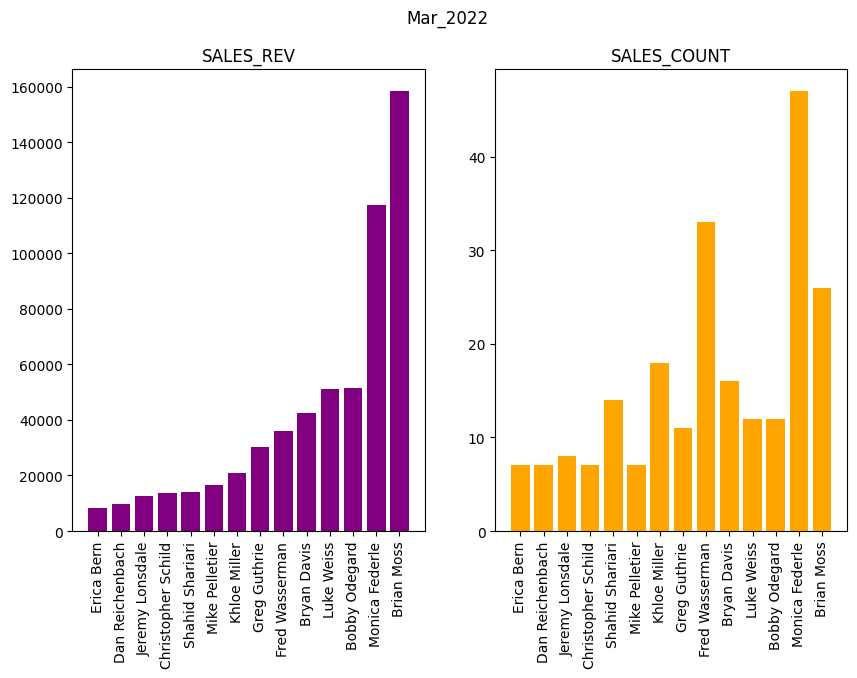

In [61]:
#Plot
plot_df(mar_22_df,'Mar_2022')

----

### `You can see that in two functions, we have summarized our results. We continue`

#### For April-2022

In [62]:
#Get the Dataframe
apr_22_df = month_group(Apr_2022_sales_data)
apr_22_df

,customer_name,sales_rev,sales_count
0,Mike Pelletier,5130.84,7
1,Erica Bern,6766.76,7
2,Muhammed MacIntyre,6826.98,7
3,Sean Wendt,12143.65,14
4,Dan Reichenbach,16026.80,8
5,Khloe Miller,18253.88,18
6,Jeremy Lonsdale,20317.38,11
7,Liz Price,27701.33,7
8,Adam Bellavance,29086.66,7
9,Meg O'Connel,39394.10,26


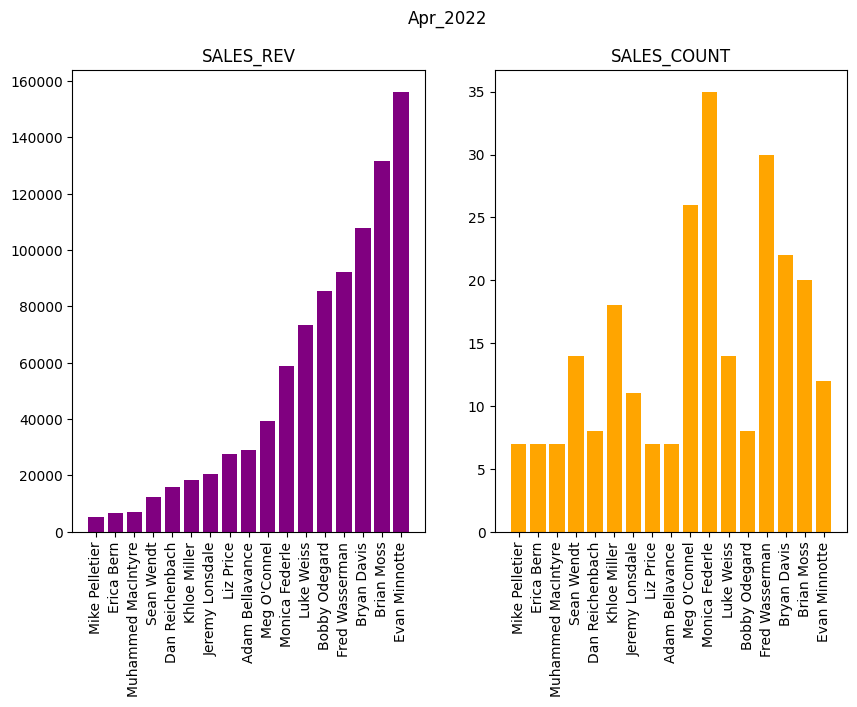

In [63]:
#Plot
plot_df(apr_22_df,'Apr_2022')

-----

#### For May-2022

In [64]:
#Get the Dataframe
may_22_df = month_group(May_2022_sales_data)
may_22_df

,customer_name,sales_rev,sales_count
0,Annie Cyprus,7758.72,7
1,Shahid Shariari,9007.23,13
2,Muhammed MacIntyre,9172.30,9
3,Fred Wasserman,9390.92,13
4,Bobby Odegard,11856.69,13
5,Cathy Armstrong,12120.68,6
6,Khloe Miller,14477.14,6
7,Jeremy Lonsdale,17703.63,9
8,Carlos Daly,26818.68,9
9,Julia West,45838.48,9


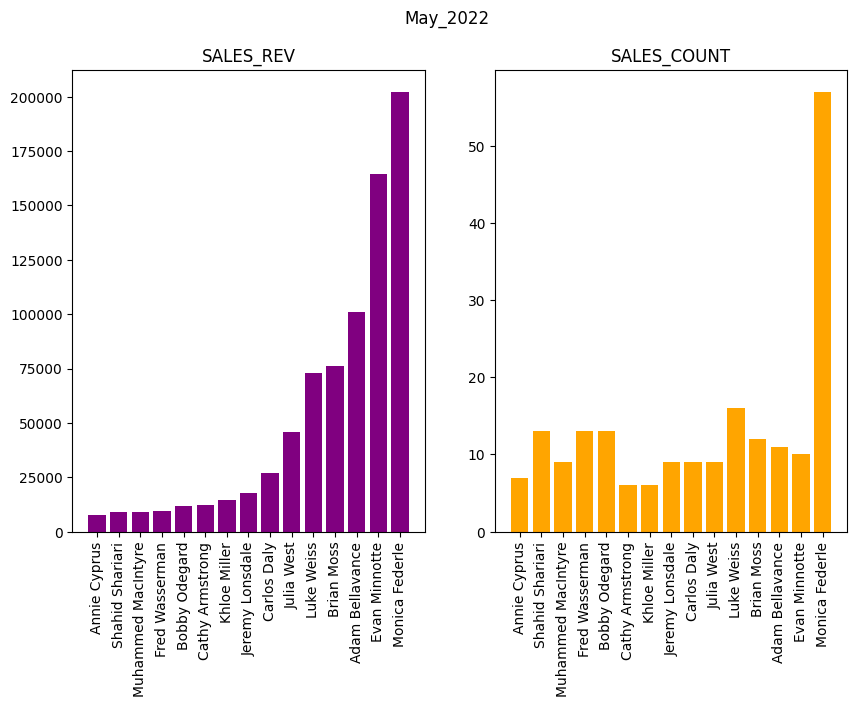

In [65]:
#Plot
plot_df(may_22_df,'May_2022')

----

#### For June-2022

In [66]:
#Get the Dataframe
jun_22_df = month_group(Jun_2022_sales_data)
jun_22_df

,customer_name,sales_rev,sales_count
0,Craig Carroll,7973.61,6
1,Bryan Davis,10947.40,6
2,Dan Reichenbach,13747.67,6
3,Shahid Shariari,14312.08,20
4,Jeremy Lonsdale,15033.36,8
5,Fred Wasserman,26594.12,10
6,Brian Moss,42865.43,14
7,Adam Bellavance,55933.35,11
8,Noah Childs,68225.19,6
9,Sean Wendt,70659.42,14


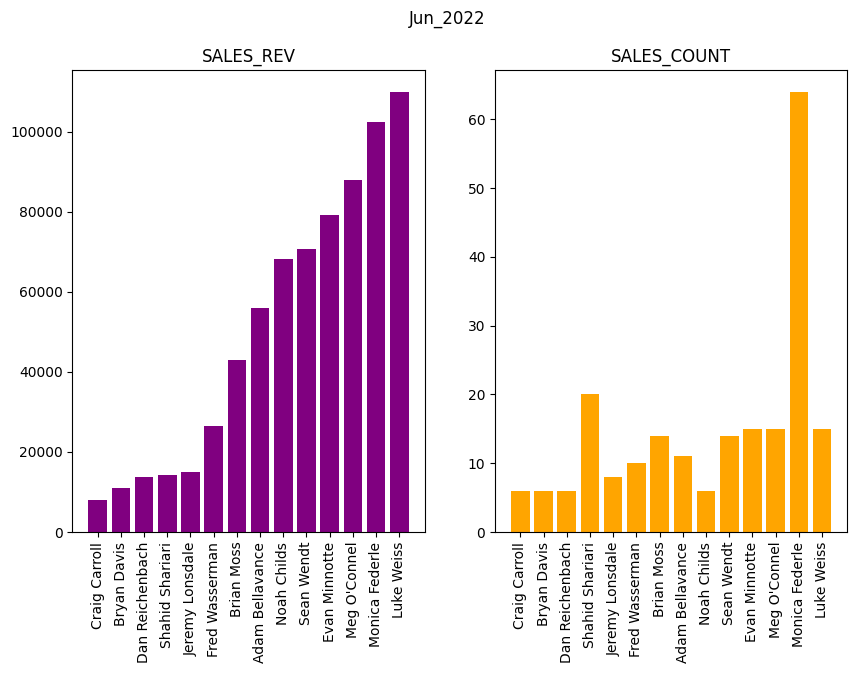

In [67]:
#Plot
plot_df(jun_22_df,'Jun_2022')

----

#### For July-2022

In [68]:
#Get the Dataframe
jul_22_df = month_group(July_2022_sales_data)
jul_22_df

,customer_name,sales_rev,sales_count
0,Brian Moss,3929.08,10
1,Alex Avila,4636.60,6
2,Rick Reed,5201.24,5
3,Bill Donatelli,10646.84,8
4,Shahid Shariari,13676.11,7
5,Muhammed MacIntyre,15054.37,12
6,Christopher Martinez,16065.63,7
7,Fred Wasserman,17828.55,8
8,Ralph Kennedy,18594.10,6
9,Luke Weiss,22618.01,6


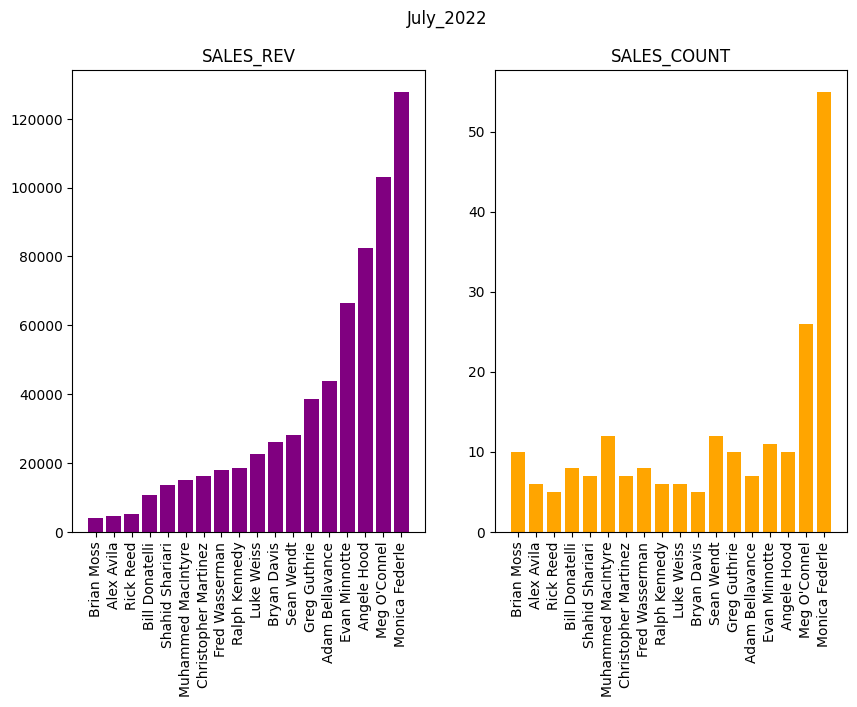

In [69]:
#Plot
plot_df(jul_22_df,'July_2022')

----

#### For Aug-2022

In [70]:
#Get the Dataframe
aug_22_df = month_group(Aug_2022_sales_data)
aug_22_df

,customer_name,sales_rev,sales_count
0,Sarah Jordon,2141.26,5
1,Claudia Miner,3149.71,5
2,Mark Cousins,3318.49,7
3,Julia Dunbar,3827.30,6
4,Mike Pelletier,3970.40,11
5,Heather Jas,3984.28,12
6,Muhammed MacIntyre,6738.23,6
7,Dan Reichenbach,6881.47,11
8,Brian Moss,10820.08,9
9,Bill Donatelli,12064.44,13


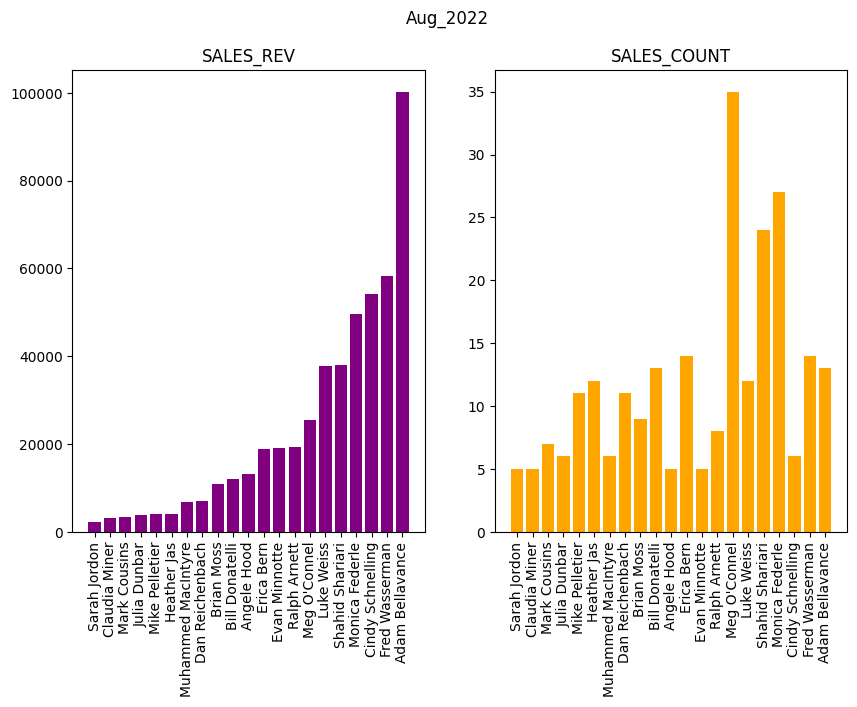

In [71]:
#Plot
plot_df(aug_22_df,'Aug_2022')

-----

#### For Sep-2022

In [72]:
#Get the Dataframe
sep_22_df = month_group(Sep_2022_sales_data)
sep_22_df

,customer_name,sales_rev,sales_count
0,Beth Paige,2630.19,8
1,Dan Reichenbach,2819.65,26
2,Brian Moss,3197.88,8
3,Sarah Jordon,4105.73,7
4,Ann Chong,4688.15,13
5,John Grady,5173.96,7
6,Logan Haushalter,5438.24,7
7,Carl Jackson,5954.45,7
8,Ralph Arnett,6342.83,7
9,Bill Donatelli,11565.88,9


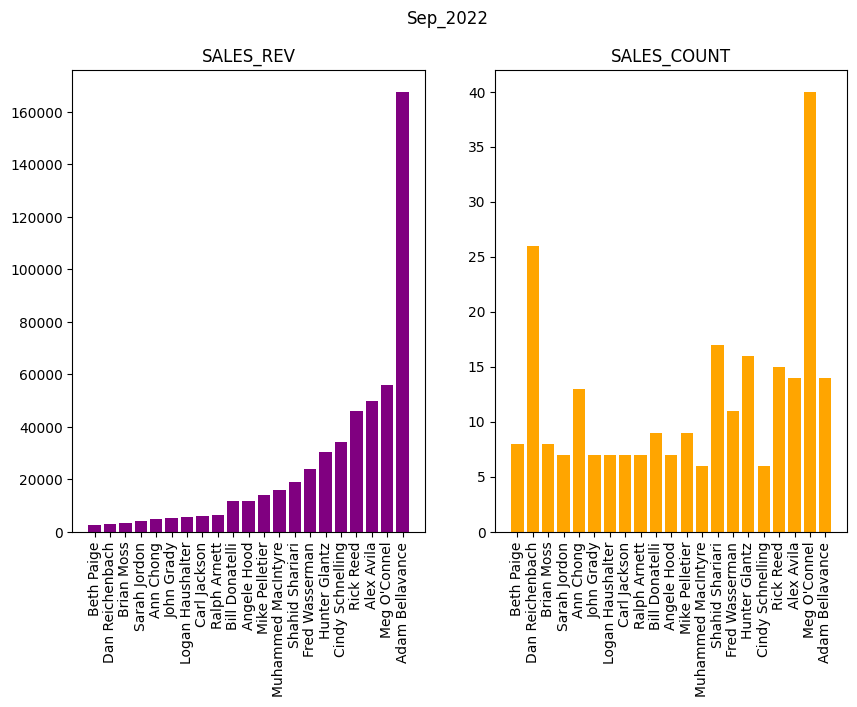

In [73]:
#Plot
plot_df(sep_22_df,'Sep_2022')

-----

#### For Oct-2022

In [74]:
#Get the Dataframe
oct_22_df = month_group(Oct_2022_sales_data)
oct_22_df

,customer_name,sales_rev,sales_count
0,Dan Reichenbach,1779.58,34
1,Ken Heidel,3548.27,22
2,Ralph Kennedy,4469.47,9
3,Ann Chong,5523.28,11
4,Beth Paige,8380.08,9
5,Doug Bickford,9219.18,8
6,Mike Kennedy,10089.65,22
7,Fred Wasserman,14825.46,18
8,Shahid Shariari,15694.15,18
9,Michael Granlund,18760.20,27


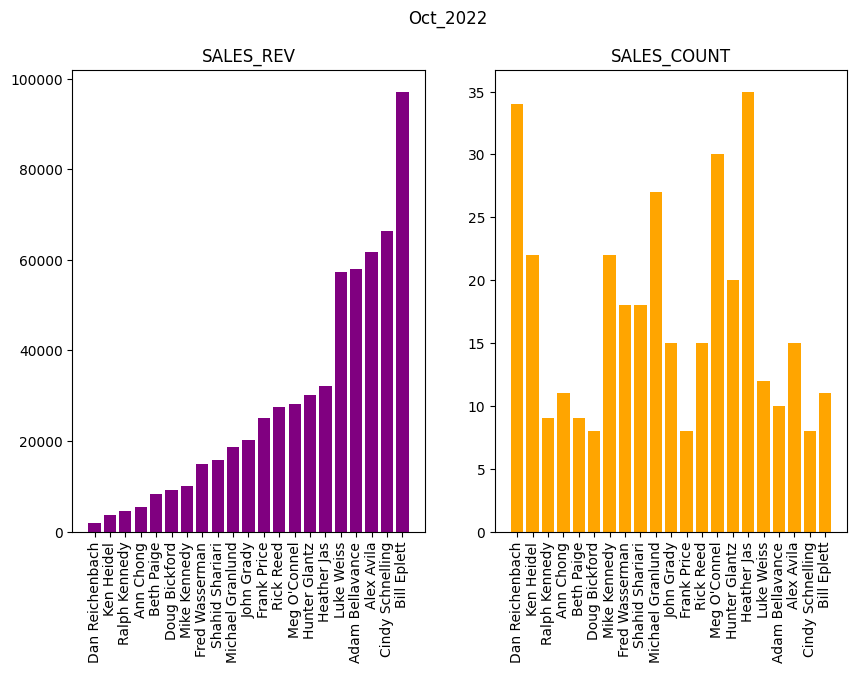

In [75]:
#Plot
plot_df(oct_22_df,'Oct_2022')

-----

#### For Nov-2022

In [76]:
#Get the Dataframe
nov_22_df = month_group(Nov_2022_sales_data)
nov_22_df

,customer_name,sales_rev,sales_count
0,Dan Reichenbach,1851.05,22
1,Eli Bockman,1896.63,8
2,Joy Smith,2075.69,8
3,Beth Paige,2370.16,7
4,Ken Heidel,2465.78,15
5,Michael Granlund,2828.05,15
6,Ann Chong,2901.47,7
7,Susan Vittorini,4441.15,6
8,Hunter Glantz,6764.18,12
9,John Grady,7318.21,7


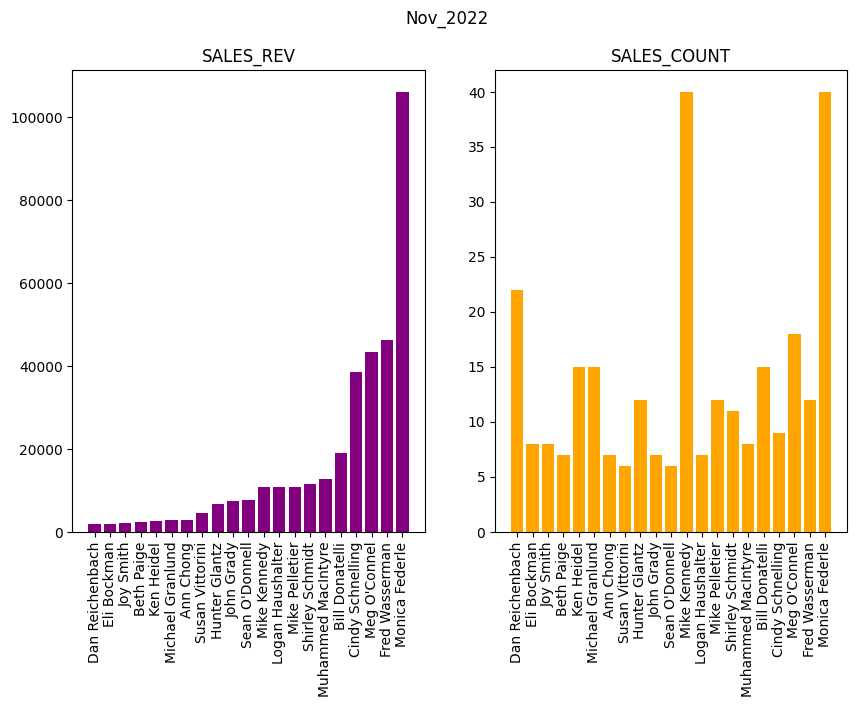

In [77]:
#Plot
plot_df(nov_22_df,'Nov_2022')

------

#### For Dec-2022

In [78]:
#Get the Dataframe
dec_22_df = month_group(Dec_2022_sales_data)
dec_22_df

,customer_name,sales_rev,sales_count
0,Erica Bern,1902.57,8
1,Joy Smith,2198.88,9
2,Bill Donatelli,2981.09,11
3,Aaron Bergman,3044.18,11
4,Sarah Jordon,4253.39,15
5,Ann Chong,5060.11,9
6,Doug Bickford,6050.29,6
7,Sean O'Donnell,6856.37,6
8,Angele Hood,6878.30,6
9,Beth Paige,7126.89,9


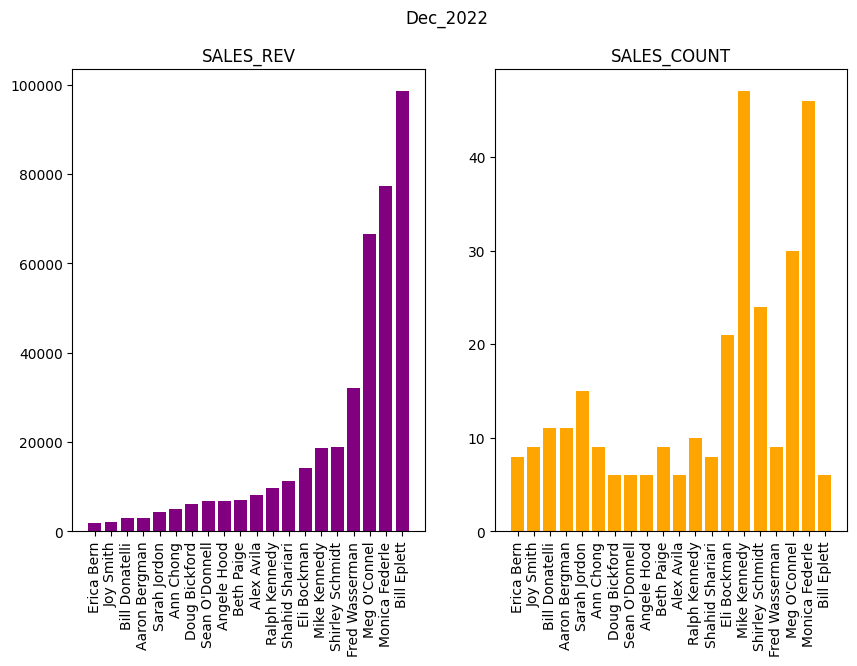

In [79]:
#Plot
plot_df(dec_22_df,'Dec_2022')

------

#### For Jan-2023

In [80]:
#Get the Dataframe
jan_23_df = month_group(Jan_2023_sales_data)
jan_23_df

,customer_name,sales_rev,sales_count
0,Sarah Jordon,1815.38,16
1,Michael Granlund,3222.13,16
2,Erica Bern,3426.35,8
3,Sean O'Donnell,4348.56,9
4,Dan Reichenbach,4724.05,18
5,Mike Kennedy,5593.52,29
6,Ralph Kennedy,6438.69,13
7,Evan Minnotte,9470.02,7
8,Shirley Schmidt,10457.73,18
9,Muhammed MacIntyre,11388.94,16


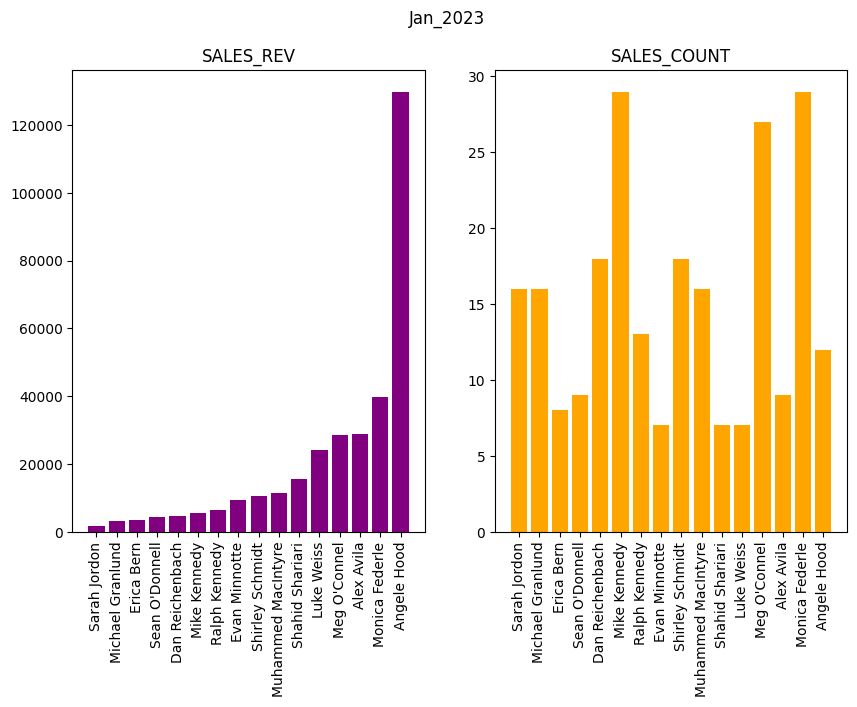

In [81]:
#Plot
plot_df(jan_23_df,'Jan_2023')

-----

#### For Feb-2023

In [82]:
#Get the Dataframe
feb_23_df = month_group(Feb_2023_sales_data)
feb_23_df

,customer_name,sales_rev,sales_count
0,Evan Minnotte,1904.81,8
1,Sarah Jordon,2432.84,12
2,Beth Paige,2948.21,13
3,Sean O'Donnell,3038.92,5
4,Erica Bern,3097.54,10
5,Ken Heidel,3189.37,9
6,Shirley Schmidt,3314.52,12
7,Angele Hood,6153.29,5
8,Sheila-kathryn Calton,6624.22,9
9,Beth Thompson,7131.21,6


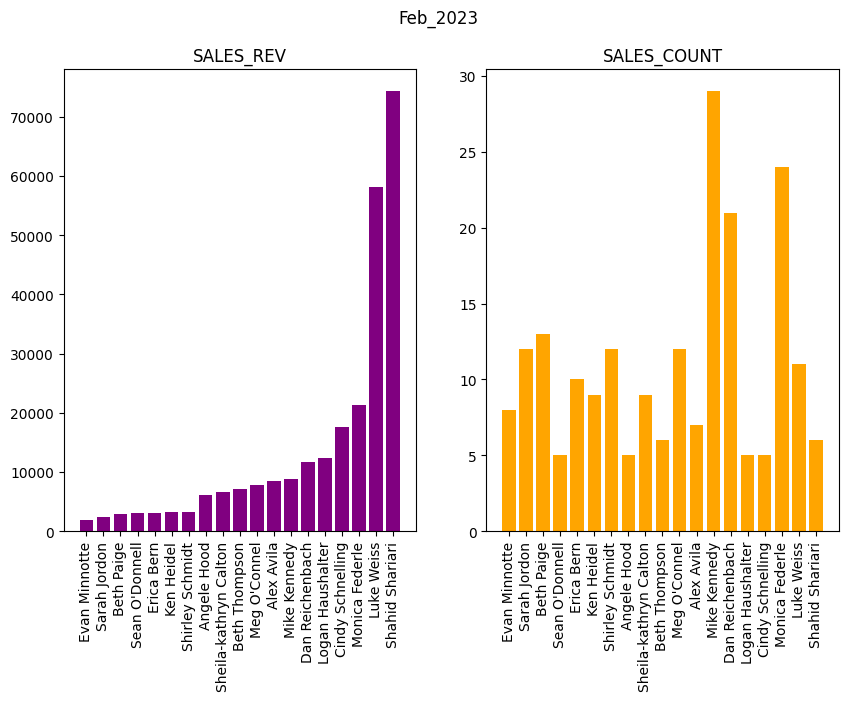

In [83]:
#Plot
plot_df(feb_23_df,'Feb_2023')

-----

#### For Mar-2023

In [84]:
#Get the Dataframe
mar_23_df = month_group(Mar_2023_sales_data)
mar_23_df

,customer_name,sales_rev,sales_count
0,Beth Paige,1661.50,6
1,Beth Thompson,2194.82,6
2,Sarah Jordon,2488.22,15
3,Sean O'Donnell,3649.77,10
4,Erica Bern,3919.51,14
5,Olav Polak,8019.68,9
6,Dan Reichenbach,8339.36,16
7,Evan Minnotte,8465.64,11
8,Mike Kennedy,9447.87,34
9,Liz MacKendrick,10579.63,8


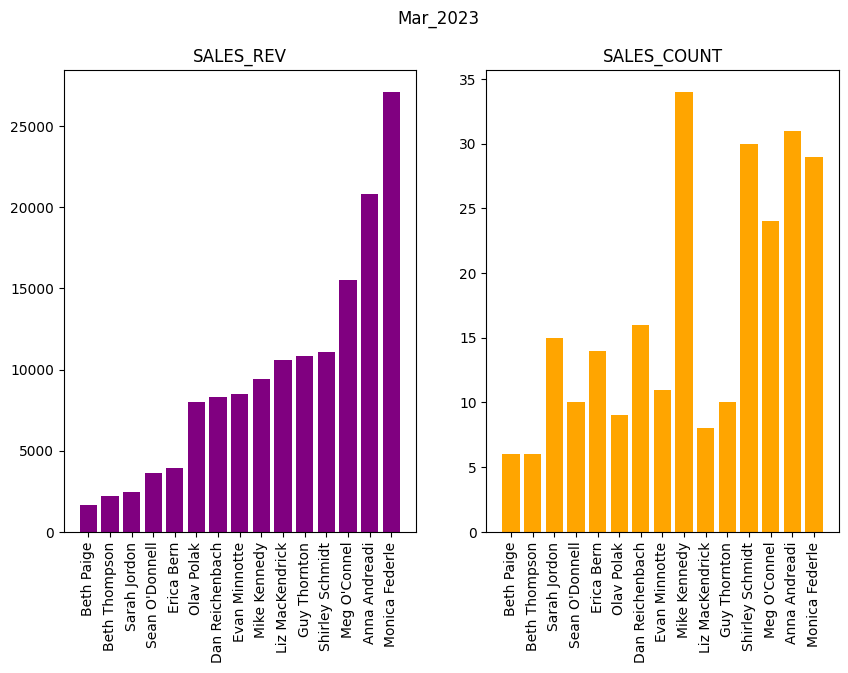

In [85]:
#Plot
plot_df(mar_23_df,'Mar_2023')

----

#### For April-2023

In [86]:
#Get the Dataframe
apr_23_df = month_group(Apr_2023_sales_data)
apr_23_df

,customer_name,sales_rev,sales_count
0,Sarah Jordon,2115.82,14
1,Olav Polak,3093.82,9
2,Anna Andreadi,5468.65,15
3,Erica Bern,6959.55,11
4,Liz MacKendrick,8786.30,11
5,Mike Kennedy,8947.00,29
6,Dan Reichenbach,11693.63,22
7,Shirley Schmidt,16419.58,25
8,Sean O'Donnell,18130.23,12
9,Monica Federle,19372.73,38


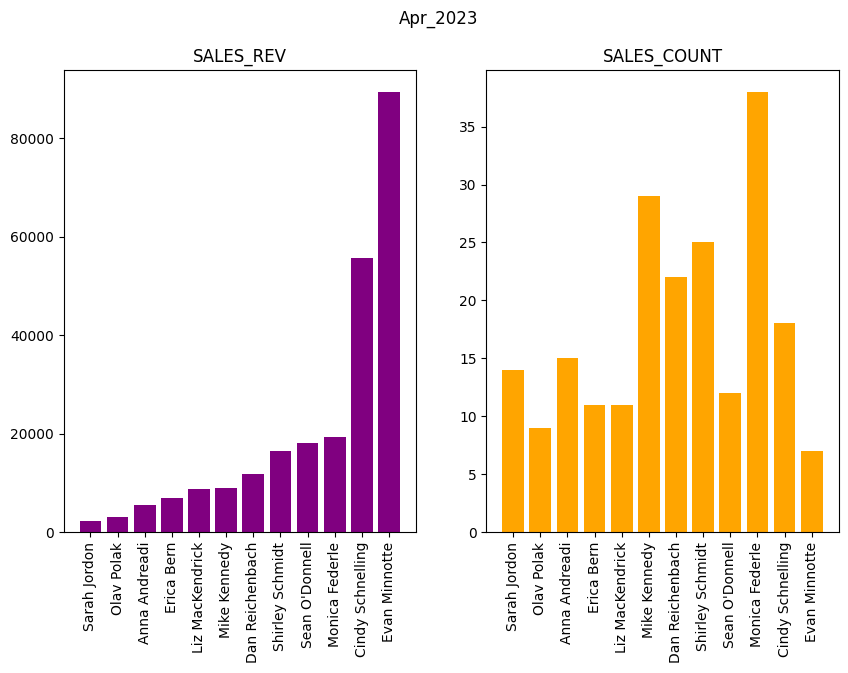

In [87]:
#Plot
plot_df(apr_23_df,'Apr_2023')

-----

#### For May-2023

In [88]:
#Get the Dataframe
may_23_df = month_group(May_2023_sales_data)
may_23_df

,customer_name,sales_rev,sales_count
0,Brian Moss,2506.30,6
1,Sean O'Donnell,2895.12,5
2,Muhammed MacIntyre,3992.25,4
3,Shirley Schmidt,6533.78,11
4,Mike Kennedy,6964.92,21
5,Monica Federle,9364.15,9
6,Deeanne Durtnell,13722.39,4
7,Dan Reichenbach,40395.19,11


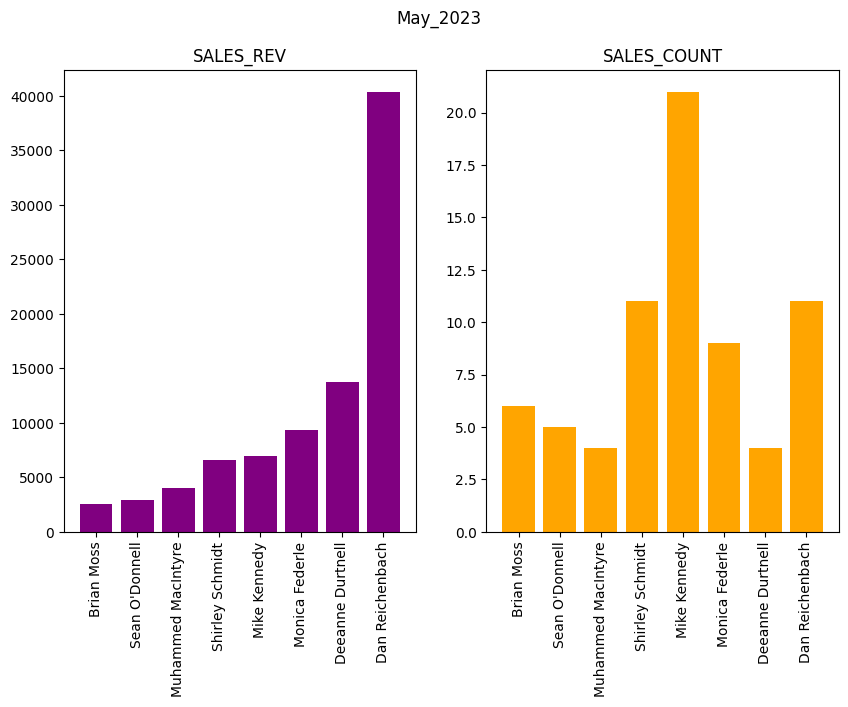

In [89]:
#Plot
plot_df(may_23_df,'May_2023')

-----

### To finalize,  we are to select customers who have consistently met our Sales_Rev & Sales_Count for at least (6) six months

In [90]:
#Append all DataFrames for each month to get a series 
#containing each customer name from every month

results = jan_22_df.customer_name.append([
    feb_22_df.customer_name,
    mar_22_df.customer_name,
    apr_22_df.customer_name,
    may_22_df.customer_name,
    jun_22_df.customer_name,
    jul_22_df.customer_name,
    aug_22_df.customer_name,
    sep_22_df.customer_name,
    oct_22_df.customer_name,
    nov_22_df.customer_name,
    dec_22_df.customer_name,
    jan_23_df.customer_name,
    feb_23_df.customer_name,
    mar_23_df.customer_name,
    apr_23_df.customer_name,
    may_23_df.customer_name
])
results

/var/folders/94/jfhnytlx5kz_c2mk3j8k5qgh0000gn/T/ipykernel_3476/3481581802.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = jan_22_df.customer_name.append([


0    Muhammed MacIntyre
1          Khloe Miller
2            Luke Weiss
3         Bobby Odegard
4        Fred Wasserman
            ...        
3       Shirley Schmidt
4          Mike Kennedy
5        Monica Federle
6      Deeanne Durtnell
7       Dan Reichenbach
Name: customer_name, Length: 270, dtype: object

----

### Finally, Our result is returned in a list

In [91]:
results = results.value_counts()[results.value_counts().values>=6]

In [92]:
#We convert out result to a DataFrame
results = results.reset_index()
results.rename(columns = {
    'index':'customer_name','customer_name':'no_of_consistent_months'},inplace =True)
results

,customer_name,no_of_consistent_months
0,Monica Federle,15
1,Dan Reichenbach,12
2,Fred Wasserman,12
3,Shahid Shariari,11
4,Luke Weiss,11
5,Meg O'Connel,11
6,Muhammed MacIntyre,9
7,Brian Moss,9
8,Evan Minnotte,9
9,Mike Kennedy,8


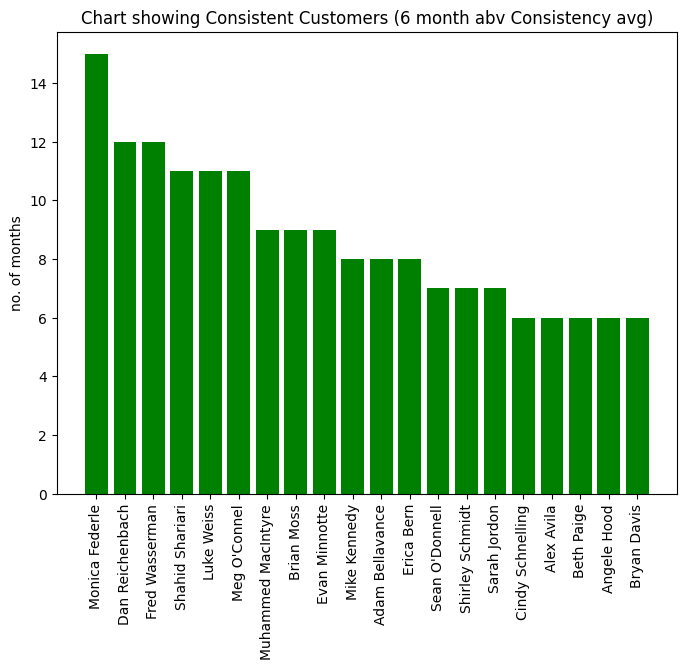

In [93]:
#Plot results
results.sort_values(by ='no_of_consistent_months',ascending=False)
#
plt.figure(figsize=(8,6))
x=results.customer_name
y=results.no_of_consistent_months
plt.bar(x,y,color='green')
plt.xticks(rotation=90)
plt.ylabel('no. of months')

plt.title('Chart showing Consistent Customers (6 month abv Consistency avg)')
plt.show()

In [94]:
df3

,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?,year,month_year
0,6,JPT-001,Paid,2022-01-02,Monica Federle,BTC,Binance,Binance,1264.12,473.62,14:23:00,598713.22,2022-01-02,03:34:01,January,Website,True,2022,January-2022
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,BTC,Binance,Binance,5800.08,473.54,14:23:00,2746546.68,2022-01-02,04:34:01,January,Website,True,2022,January-2022
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,BTC,Binance,Binance,368.08,476.92,14:23:00,175545.08,2022-01-03,05:34:01,January,Website,True,2022,January-2022
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,BTC,Binance,Binance,6928.86,475.23,14:23:00,3292785.02,2022-01-05,09:34:01,January,Website,True,2022,January-2022
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,929.50,473.54,14:23:00,440151.71,2022-01-06,10:34:01,January,Website,True,2022,January-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,6054,JPT-004,Paid,2023-05-14,Mike Kennedy,USDT,Binance,ObiEx,72.87,618.98,19:10:00,45106.75,2023-05-14,19:12:00,May,Website,True,2023,May-2023
5521,6055,JPT-004,Paid,2023-05-14,Muhammed MacIntyre,BTC,Trust,ObiEx,2307.99,632.51,20:26:00,1459821.25,2023-05-14,20:48:00,May,Website,True,2023,May-2023
5522,6056,JPT-004,Paid,2023-05-14,Muhammed MacIntyre,BTC,Trust,ObiEx,593.10,628.28,22:42:00,372630.43,2023-05-14,23:46:00,May,Website,True,2023,May-2023
5523,6057,JPT-004,Paid,2023-05-14,Shirley Schmidt,BTC,Blockchain,ObiEx,864.21,624.90,23:25:00,540044.65,2023-05-14,23:50:00,May,Website,True,2023,May-2023


In [95]:
results.customer_name

0         Monica Federle
1        Dan Reichenbach
2         Fred Wasserman
3        Shahid Shariari
4             Luke Weiss
5           Meg O'Connel
6     Muhammed MacIntyre
7             Brian Moss
8          Evan Minnotte
9           Mike Kennedy
10       Adam Bellavance
11            Erica Bern
12        Sean O'Donnell
13       Shirley Schmidt
14          Sarah Jordon
15      Cindy Schnelling
16            Alex Avila
17            Beth Paige
18           Angele Hood
19           Bryan Davis
Name: customer_name, dtype: object

In [96]:
df7 = df3[df3.customer_name.isin(['Monica Federle',
                            'Dan Reichenbach',
                            'Fred Wasserman',
                            'Shahid Shariari',
                            'Luke Weiss',
                            "'Meg O'Connel",
                            'Muhammed MacIntyre',
                            'Brian Moss',
                            'Evan Minnotte',
                            'Mike Kennedy',
                            'Adam Bellavance',
                            'Erica Bern',
                            "Sean O'Donnell",
                            'Shirley Schmidt',
                            'Sarah Jordon',
                            'Cindy Schnelling',
                            'Alex Avila',
                            'Beth Paige',
                            'Angele Hood',
                            'Bryan Davis'])]

In [97]:
df7

,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?,year,month_year
0,6,JPT-001,Paid,2022-01-02,Monica Federle,BTC,Binance,Binance,1264.12,473.62,14:23:00,598713.22,2022-01-02,03:34:01,January,Website,True,2022,January-2022
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,BTC,Binance,Binance,5800.08,473.54,14:23:00,2746546.68,2022-01-02,04:34:01,January,Website,True,2022,January-2022
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,BTC,Binance,Binance,6928.86,475.23,14:23:00,3292785.02,2022-01-05,09:34:01,January,Website,True,2022,January-2022
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,929.50,473.54,14:23:00,440151.71,2022-01-06,10:34:01,January,Website,True,2022,January-2022
6,15,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,1319.89,475.23,14:23:00,627247.63,2022-01-09,13:34:01,January,Website,True,2022,January-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,6054,JPT-004,Paid,2023-05-14,Mike Kennedy,USDT,Binance,ObiEx,72.87,618.98,19:10:00,45106.75,2023-05-14,19:12:00,May,Website,True,2023,May-2023
5521,6055,JPT-004,Paid,2023-05-14,Muhammed MacIntyre,BTC,Trust,ObiEx,2307.99,632.51,20:26:00,1459821.25,2023-05-14,20:48:00,May,Website,True,2023,May-2023
5522,6056,JPT-004,Paid,2023-05-14,Muhammed MacIntyre,BTC,Trust,ObiEx,593.10,628.28,22:42:00,372630.43,2023-05-14,23:46:00,May,Website,True,2023,May-2023
5523,6057,JPT-004,Paid,2023-05-14,Shirley Schmidt,BTC,Blockchain,ObiEx,864.21,624.90,23:25:00,540044.65,2023-05-14,23:50:00,May,Website,True,2023,May-2023


In [98]:
# Export the dataframe for Visualization
df7.to_csv('Consistency_analysis_df.csv')

In [99]:
df2

,order_no,staff_name,order_status,order_date,customer_name,coin,sender_wallet,receiver_wallet,coin_amount(usd),purchase_rate(ngnusd),order_time,amount_due(ngn),date_paid,time_paid,month,channel,completed?,year,month_year
0,6,JPT-001,Paid,2022-01-02,Monica Federle,BTC,Binance,Binance,1264.12,473.62,14:23:00,598713.22,2022-01-02,03:34:01,January,Website,True,2022,January-2022
1,8,JPT-001,Paid,2022-01-03,Bryan Davis,BTC,Binance,Binance,5800.08,473.54,14:23:00,2746546.68,2022-01-02,04:34:01,January,Website,True,2022,January-2022
2,9,JPT-001,Paid,2022-01-03,Carlos Daly,BTC,Binance,Binance,368.08,476.92,14:23:00,175545.08,2022-01-03,05:34:01,January,Website,True,2022,January-2022
3,11,JPT-001,Paid,2022-01-04,Bryan Davis,BTC,Binance,Binance,6928.86,475.23,14:23:00,3292785.02,2022-01-05,09:34:01,January,Website,True,2022,January-2022
4,12,JPT-001,Paid,2022-01-04,Muhammed MacIntyre,BTC,Binance,Binance,929.50,473.54,14:23:00,440151.71,2022-01-06,10:34:01,January,Website,True,2022,January-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,6086,JPT-004,Paid,2023-05-16,Sean O'Donnell,BTC,Trust,ObiEx,84.47,617.29,17:46:00,52144.14,2023-05-16,19:17:00,May,Website,False,2023,May-2023
5553,6087,JPT-004,Paid,2023-05-16,Shirley Schmidt,BTC,Blockchain,ObiEx,460.44,624.90,20:41:00,287726.42,2023-05-16,20:47:00,May,Website,False,2023,May-2023
5554,6088,JPT-004,Confirmed,2023-05-16,Dan Reichenbach,BTC,Cashapp,ObiEx,6326.18,630.82,20:59:00,3990663.79,2023-05-16,05:34:01,May,Website,False,2023,May-2023
5555,6088,JPT-004,Paid,2023-05-16,Dan Reichenbach,BTC,Cashapp,ObiEx,1867.92,630.82,22:27:00,1178318.83,2023-05-16,23:22:00,May,Website,False,2023,May-2023


-----